**Importing the Modules**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from neuralprophet import NeuralProphet

**Reading and processing the Data**

In [27]:
stock = input("Enter the stock symbol: ")# e.g 'TSLA',GOOG,APPL
start = input("Enter the start date (YYYY-MM-DD): ")#'2013-01-01'
end = input("Enter the end date (YYYY-MM-DD): ")#'2023-12-31'
data = yf.download(stock, start, end)
data.reset_index(inplace=True)
print(data.head())

[*********************100%%**********************]  1 of 1 completed

        Date      Open      High       Low     Close  Adj Close    Volume
0 2013-01-02  2.333333  2.363326  2.313666  2.357333   2.357333  17920650
1 2013-01-03  2.345333  2.363333  2.316666  2.318000   2.318000  11129115
2 2013-01-04  2.320000  2.320000  2.261333  2.293333   2.293333  10109895
3 2013-01-07  2.320000  2.320000  2.260000  2.289333   2.289333   6628635
4 2013-01-08  2.300000  2.300000  2.207333  2.245333   2.245333  19259775


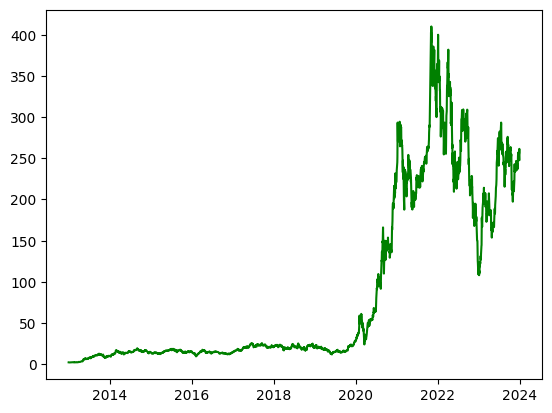

In [23]:
stocks = data[['Date', 'Close']].copy()
stocks.columns = ['ds', 'y']
plt.plot(stocks['ds'], stocks['y'], label='actual', c='g')
plt.show()

**Training the Model**

In [28]:
model=NeuralProphet()
model.fit(stocks,freq="D")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.351% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.351% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 

Finding best initial lr:   0%|          | 0/236 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

AttributeError: 'Index' object has no attribute '_format_flat'

           MAE        RMSE      Loss  RegLoss  epoch
0   292.387268  366.695374  0.627483      0.0      0
1   212.726746  261.808380  0.429042      0.0      1
2   155.634094  181.975479  0.283018      0.0      2
3   111.178246  124.770927  0.178203      0.0      3
4    70.952400   83.252281  0.095542      0.0      4
..         ...         ...       ...      ...    ...
75   16.453461   29.451195  0.016358      0.0     75
76   16.392015   29.376080  0.016280      0.0     76
77   16.484745   29.435890  0.016472      0.0     77
78   16.493044   29.686304  0.016384      0.0     78
79   16.608156   29.666029  0.016566      0.0     79

[80 rows x 5 columns]

**Model Making the Prediction**

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.351% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.351% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.0% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.0% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal t

Predicting: 44it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.351% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.351% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.351% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.351% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 44it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


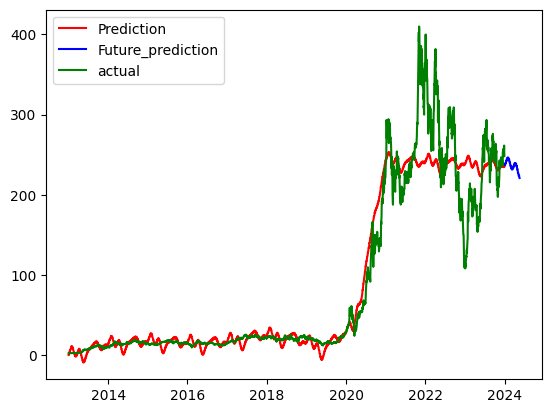

In [25]:
prediction = model.make_future_dataframe(stocks,periods = 100)

forecasting = model.predict(prediction)
real_prediction = model.predict(stocks)

plt.plot(real_prediction['ds'],real_prediction['yhat1'],label = "Prediction" , c = 'r')
plt.plot(forecasting['ds'],forecasting['yhat1'],label = 'Future_prediction',c='b')
plt.plot(stocks['ds'],stocks['y'],label ='actual' ,c='g')
plt.legend()
plt.show()

**TRENDS**

In [26]:
model.plot_components(forecasting)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
